# Dynamic Agency Model, Standard Stationary Solution

## Packages

In [1]:
using Pkg
using Plots
#using Interact, Convex, SCS, JuMP, ECOS, HDF5,JLD
using DelimitedFiles
using CSV
using DataFrames


## Parameters and Functions

In [2]:
# adding working directory/src/ to load path
push!(LOAD_PATH,"./src/")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "./src/"

In [3]:
### Parameters ###

# loading model
using StationaryStandard
ss = StationaryStandard


┌ Info: Precompiling StationaryStandard [top-level]
└ @ Base loading.jl:1260


StationaryStandard

## Overview of the model



This model is similar to Wang (1997).

The value function is the principal expected discounted utility, that is

$$U(V) = \mathbb{E}[y-w_y+ \beta U(V,y)] $$

where $y$ is the observed output, $w_y$ is the compensation given the observed output $y$ and $\beta$ is the discount factor.

$V \in \mathbf{V}$ is the expected utility and the state variable of the model, 

Furthermore, $\hat{V}(V)$ is the agent's expected (discounted) utility

$$\hat{V}(V) = \mathbb{E}[v(w_y) - a + \beta V(V,y)], $$

where $v(w)$ is the crra function, and $a \in A$ is the effort exerted by the agent.

In addition, $V(V,y) = V_y(V)$ is the agent future compensation, which is the promised expected utility of tomorrow.

Now , let $\mathcal{V}(V)$ and $\mathcal{U}(V)$  be the set of feasible and incentive compatible expected discounted utilities of the agent and  principal. Wang (1997) demonstrates that $\mathcal{U}(V)$ is compact.

Therefore, by virtue of the Bellman equation $U^*(V) = \{ \max U(contract, history_{t=0}) \in \mathcal{U}(V) \} $, which is the principal's best expected discounted utility, the program is 

$$\max_{w_y(V),a(V), V_y(V)}   \mathbb{E}[y-w_y(V)+ \beta U(V,y)] $$

subject to 

\begin{equation}
\tag{Incentive Compatible}
a(V) \in argmax_{\text{ } a'} \quad \hat{V}(V, a')
\end{equation}

\begin{equation}
\tag{Individual Rationality}
 \hat{V}(V, a(V)) = V
\end{equation}

\begin{equation}
\tag{Feasible Effort}
a(V) \in A
\end{equation}

\begin{equation}
\tag{Limited Liability}
0 \leq w_y(V) \leq  y \qquad \text{for all } y
\end{equation}

\begin{equation}
\tag{Feasible and Incentive compatible $V_y$ }
V_y(V) \in \mathcal{V}  \qquad  \text{for all } y
\end{equation}

Wang (1997) proved that $U^*$ is a fixed point of the operator $\Gamma$ that is defined by the program. $\Gamma$ maps from the space of bounded continuous functions $U: \mathcal{V} \rightarrow \mathbb{R}$ with the sup norm into itself.



## Estimation

### Estimation overview





To compute the optimal contract, we choose the utility function

$$v(w) = \frac{w^{1-c}}{1-c}$$ where $c$ is the coefficient of constant relative risk aversion, $c = 0.5$.

The probability distribution function of output and action is 
$$f_l(a)=  e^{-a}$$
$$f_h(a)=  1- e^{-a}$$


Furthermore,  $y \in \{y_l, y_h\}$, $y_l = 2$,  $y_h = 4$, $\mathbf{V} = [(v(0)-a_h)/(1-\beta),(v(w_l)f_l(0)+v(w_h)f_h(0)- a_l)/(1-\beta)]$ and efforts are nonnegative. The upper bound of $\mathbf{V}$ can be selected larger than the static case on the basis of adding future discounted utility, and thus exploring a bigger portion of the Pareto frontier.

Note that $a_l= 0$, and  $a_h$ can be defined from 0 to any positive number; $a_h$ represents the maximum value that effort can take, which is reflected in $\mathbf{V}$. 

The state variable $V$ is discretized in $n$ states; usually $n=100$.

By the incentive compatible constraint, the optimal effort the agent chooses is
$$ a^* = \ln {\Big( \frac{w_h^{1 - c} - w_l^{1 - c}}{1 - c} + \beta (V_h - V_l)\Big)} $$


### Numerical approximation

In [4]:
#set_parameters_cara(1)
ss.set_parameters_crra(0.5)
ss.incentive_compatible

 *** setting y low = 2 , y high = 4 , a min = 0 ,  a max = 2 , crra = 0.5 , crra function, f_continuous
 *** reservation utilities : 0.0 - 70.7106781186547


incentive_compatible_continuous (generic function with 1 method)

In [17]:
#ss.set_parameters_crra(0.5)
Value_function = ss.open_results("stationary_value_f_continuous_100_step40.csv");
ss.load_compensations("_step200")

Loading values, archive address : ./data/stationary_value_f_continuous_100_step40.csv
elements in list of state variable: 100
Loading compensations, archive name : stationary_compensations_f_continuous_100_step200.csv
elements in dictionary : 3671


In [9]:
for i in 1:10
    println("Resetting dictionaries ", i)
    ss.reset_compensations()
    #step = 0.1/sqrt(i)
    step = 0.01
    Value_function = ss.bellman_equation_naive(500, Value_function, step )
end

Resetting dictionaries 1
*************Starting Naive Dynamic compensations Algorithm *************
************* Calculating optimal present compensations *************
************* Number of steps : ********* h (V) 100 **** wl 20.0  **** a 1************
 -- (1) -- -- (2) -- -- (3) -- -- (4) -- -- (5) -- -- (6) -- -- (7) -- -- (8) -- -- (9) -- -- (10) -- -- (11) -- -- (12) -- -- (13) -- -- (14) -- -- (15) -- -- (16) -- -- (17) -- -- (18) -- -- (19) -- -- (20) -- -- (21) -- -- (22) -- -- (23) -- -- (24) -- -- (25) -- -- (26) -- -- (27) -- -- (28) -- -- (29) -- -- (30) -- -- (31) -- -- (32) -- -- (33) -- -- (34) -- -- (35) -- -- (36) -- -- (37) -- -- (38) -- -- (39) -- -- (40) -- -- (41) -- -- (42) -- -- (43) -- -- (44) -- -- (45) -- -- (46) -- -- (47) -- -- (48) -- -- (49) -- -- (50) -- -- (51) -- -- (52) -- -- (53) -- -- (54) -- -- (55) -- -- (56) -- -- (57) -- -- (58) -- -- (59) -- -- (60) -- -- (61) -- -- (62) -- -- (63) -- -- (64) -- -- (65) -- -- (66) -- -- (67) -- -- (68) -- -- (

iteration : 150 , max dist : 5.746824029984055e-7 , sum dist : 2.1277528823859804e-5
iteration : 175 , max dist : 1.5720101487204374e-7 , sum dist : 7.362971647550953e-6
iteration : 200 , max dist : 4.670404507578496e-8 , sum dist : 2.5860406296374094e-6
iteration : 225 , max dist : 1.4712693285900968e-8 , sum dist : 9.182358624570952e-7
iteration : 250 , max dist : 4.875932546610784e-9 , sum dist : 3.2734333288431117e-7
iteration : 275 , max dist : 1.6705286043361411e-9 , sum dist : 1.1705322577881816e-7
iteration : 300 , max dist : 5.830180782595562e-10 , sum dist : 4.190313518392941e-8
iteration : 325 , max dist : 2.056879111478338e-10 , sum dist : 1.5015405807616844e-8
iteration : 350 , max dist : 7.297273896256229e-11 , sum dist : 5.383054002550125e-9
iteration : 375 , max dist : 2.595612613731646e-11 , sum dist : 1.930814619299781e-9
iteration : 400 , max dist : 9.244160992238903e-12 , sum dist : 6.927258766609157e-10
iteration : 425 , max dist : 3.304023721284466e-12 , sum dist 

 -- (1) -- -- (2) -- -- (3) -- -- (4) -- -- (5) -- -- (6) -- -- (7) -- -- (8) -- -- (9) -- -- (10) -- -- (11) -- -- (12) -- -- (13) -- -- (14) -- -- (15) -- -- (16) -- -- (17) -- -- (18) -- -- (19) -- -- (20) -- -- (21) -- -- (22) -- -- (23) -- -- (24) -- -- (25) -- -- (26) -- -- (27) -- -- (28) -- -- (29) -- -- (30) -- -- (31) -- -- (32) -- -- (33) -- -- (34) -- -- (35) -- -- (36) -- -- (37) -- -- (38) -- -- (39) -- -- (40) -- -- (41) -- -- (42) -- -- (43) -- -- (44) -- -- (45) -- -- (46) -- -- (47) -- -- (48) -- -- (49) -- -- (50) -- -- (51) -- -- (52) -- -- (53) -- -- (54) -- -- (55) -- -- (56) -- -- (57) -- -- (58) -- -- (59) -- -- (60) -- -- (61) -- -- (62) -- -- (63) -- -- (64) -- -- (65) -- -- (66) -- -- (67) -- -- (68) -- -- (69) -- -- (70) -- -- (71) -- -- (72) -- -- (73) -- -- (74) -- -- (75) -- -- (76) -- -- (77) -- -- (78) -- -- (79) -- -- (80) -- -- (81) -- -- (82) -- -- (83) -- -- (84) -- -- (85) -- -- (86) -- -- (87) -- -- (88) -- -- (89) -- -- (90) -- -- (91) -- -- (92)

In [18]:
step = 0.01
#Value_function = fill(0.0,100)
Value_function = ss.bellman_equation_naive(500, Value_function, step );

*************Starting Naive Dynamic compensations Algorithm *************
iteration : 25 , max dist : 0.003430687888368311 , sum dist : 0.22836640310729378
iteration : 50 , max dist : 0.001101756919169361 , sum dist : 0.08232600839765447
iteration : 75 , max dist : 0.0003565108642362702 , sum dist : 0.03004707796986239
iteration : 100 , max dist : 0.0001247996652804506 , sum dist : 0.011000877915866125
iteration : 125 , max dist : 4.4977389632050446e-5 , sum dist : 0.004021054578895011
iteration : 150 , max dist : 1.620970355631357e-5 , sum dist : 0.001468241127451364
iteration : 175 , max dist : 5.841923942928595e-6 , sum dist : 0.0005342722109454856
iteration : 200 , max dist : 2.1054102097295413e-6 , sum dist : 0.0001937110457111979
iteration : 225 , max dist : 7.587829280453207e-7 , sum dist : 6.999599400348e-5
iteration : 250 , max dist : 2.7346287723162277e-7 , sum dist : 2.5241993506064375e-5
iteration : 275 , max dist : 9.855512317358261e-8 , sum dist : 9.090344048279242e-6
ite

In [20]:
ss.save_results(Value_function,"stationary_value_$(ss.f)"*"_$(ss.h)_step200.csv")
ss.save_compensations("_step200")



Saving values, archive  address: ./data/stationary_value_f_continuous_100_step200.csv
Saving compensations....
Saving dictionaries, archive address: ./data/stationary_compensations_f_continuous_100_step200.csv


# Ploting

In [19]:

#using Pkg
using Plots
#Pkg.add("Plots")
#Pkg.add("LaTexStrings")
#using LaTexStrings

gr() # Switch to using the PyPlot.jl backend

#plot(rand(5,5),linewidth=2,title="My Plot") # The same plotting command works
#theme(:dark)

# Variables from estimation
k_0 = ss.k_0
k_f = ss.k_f
V = ss.V
V_l = ss.V_l
V_h = ss.V_h
w_l = ss.w_l
w_h = ss.w_h
a_opt = ss.a_opt
a_static = ss.a_static;

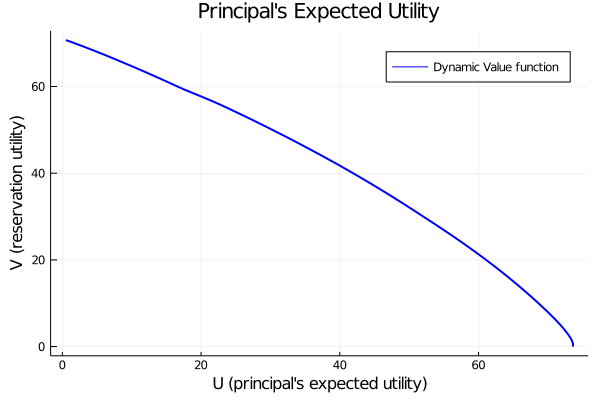

In [20]:
fig = plot(Value_function[k_0:(k_f)],
    V[k_0:k_f],
    lw = 2,
    c = :blue,
    label="Dynamic Value function",
    legend=:topright,
    xlabel = " U (principal's expected utility) ",
    ylabel = " V (reservation utility) ",
    title = "Principal's Expected Utility")#

#plot!(V[k_0:k_f],U_static[k_0:k_f]/(1-beta),lw = 2, c = :yellow,label="Static Value function")

savefig("./reports/stationary_frontier.pdf")
fig

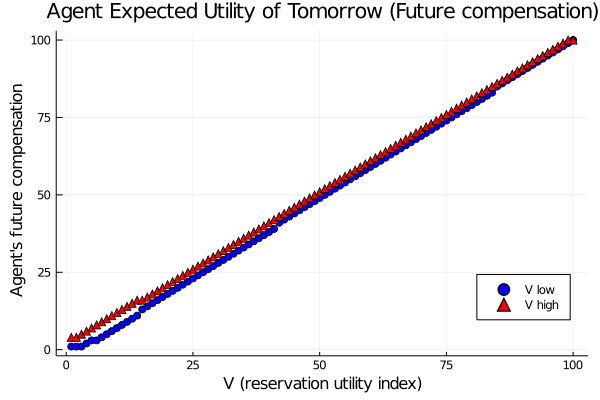

In [21]:
fig = scatter(Array([k_0:k_f]),
    V_l[k_0:k_f],
    c = :blue,
    label="V low",
    legend = :bottomright,
    ylabel = " Agent's future compensation",
    xlabel = " V (reservation utility index) ",
    title = "Agent Expected Utility of Tomorrow (Future compensation)"
    )
fig = scatter!(Array([k_0:k_f]),
    V_h[k_0:k_f],
    c = :red,
    shape = :^,
    label="V high"
    )
savefig("./reports/stationary_expected_utilities.pdf")
fig

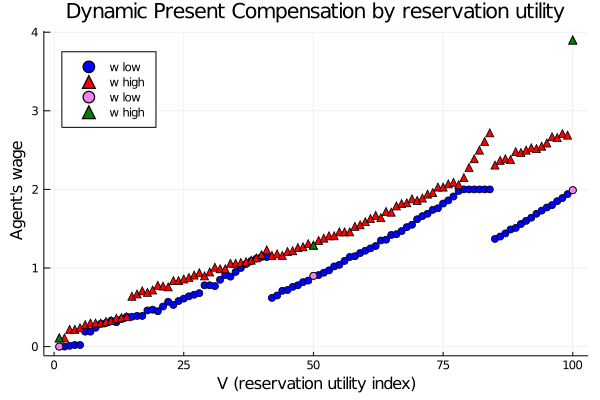

In [22]:
fig = scatter(Array([k_0:k_f]),
    w_l[k_0:k_f],
    c = :blue,
    label="w low",
    legend=:topleft,
    ylabel = " Agent's wage",
    xlabel = " V (reservation utility index) ",
    title = "Dynamic Present Compensation by reservation utility")

scatter!(Array([k_0:k_f]),
    w_h[k_0:k_f],
    c = :red,
    shape = :^,
    label="w high"
    )

scatter!(Array([k_0, 50, k_f]),
    [w_l[k_0], w_l[50], w_l[k_f]],
    c = :violet,
    label="w low"
    )

scatter!(Array([k_0, 50, k_f]),
    [w_h[k_0], w_h[50], w_h[k_f]],
    c = :green,
    shape = :^,
    label="w high"
    )

savefig("./reports/stationary_wages.pdf")
fig

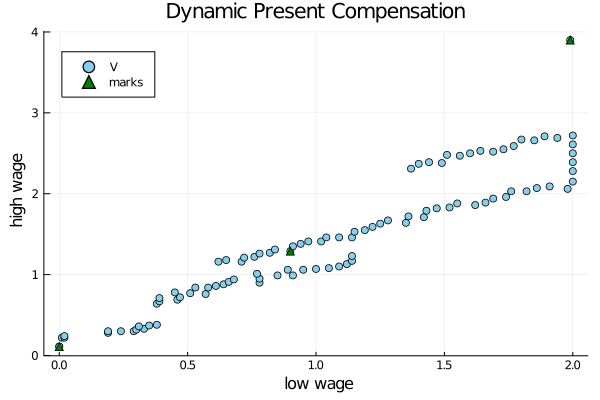

In [23]:
fig = scatter(
    w_l[k_0:k_f],
    w_h[k_0:k_f],
    c = :skyblue,
    label="V",
    legend=:topleft,
    ylabel = " high wage",
    xlabel = " low wage",
    title = "Dynamic Present Compensation")


scatter!([w_l[k_0], w_l[50], w_l[k_f]],
    [w_h[k_0], w_h[50], w_h[k_f]],
    c = :green,
    shape = :^,
    label="marks"
    )

savefig("./reports/stationary_wagelow_high.pdf")
fig

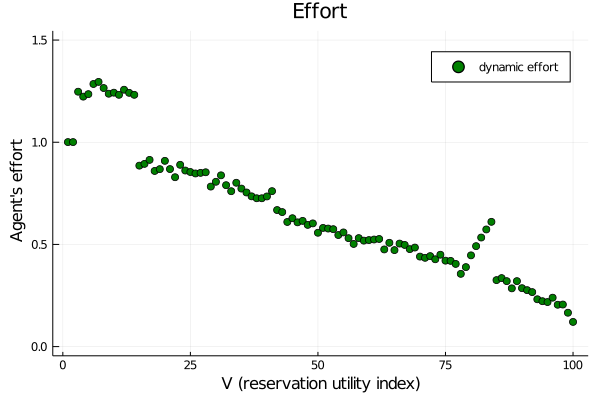

In [24]:

fig = scatter(Array(k_0:k_f),
    a_opt[k_0:k_f],
    c = :green,
    label="dynamic effort",
    ylims=[0,1.5],
    ylabel = " Agent's effort",
    xlabel = " V (reservation utility index) ",
    title = "Effort")
savefig("./reports/stationary_efforts.pdf")
fig

# Exporting values

In [29]:
df = DataFrame(u_princ = Value_function, u_agent = V,w_l = w_l, w_h = w_h,u_l =V_l, u_h = V_h, a = a_opt)

,u_princ,u_agent,w_l,w_h,u_l,u_h,a
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,73.6089,0.0,0.0,0.11,1.0,4.0,1.00077
2,73.6089,0.714249,0.0,0.11,1.0,4.0,1.00077
3,73.4372,1.4285,0.01,0.22,1.0,5.0,1.24726
4,73.1957,2.14275,0.02,0.22,2.0,6.0,1.22317
5,72.8882,2.857,0.02,0.24,3.0,7.0,1.23538
6,72.5474,3.57125,0.19,0.28,3.0,8.0,1.28507
7,72.183,4.2855,0.19,0.3,4.0,9.0,1.29529
8,71.7899,4.99974,0.24,0.3,5.0,10.0,1.26527
9,71.3777,5.71399,0.29,0.3,6.0,11.0,1.23745


In [33]:

# write DataFrame out to CSV file
CSV.write("./data/stationary_standard_crra_0.5_100_step200.csv", df)

"./data/stationary_standard_crra_0.5_100_step200.csv"

# Comparing models

In [8]:
df_mo = CSV.read("./data/stationary_mo_standard_crra_0.5_100_step200.csv")
df_st = CSV.read("./data/stationary_standard_crra_0.5_100_step200.csv")

ArgumentError: ArgumentError: "./data/stationary_mo_standard_crra_0.5_100_step200.csv" is not a valid file

In [ ]:
fig = plot(Value_function[k_0:(k_f)],
    V[k_0:k_f],
    lw = 2,
    c = :blue,
    label="Standard",
    legend=:topright,
    xlabel = " U (principal's expected utility) ",
    ylabel = " V (reservation utility) ",
    title = "Principal's Expected Utility")#

plot!(V[k_0:k_f],U_static[k_0:k_f]/(1-beta),lw = 2, c = :red,label="MO")

savefig("./reports/stationary_frontier.pdf")
fig